# Walmart Project

**The aim of this project is to find out the purchase behaviour of male and female customers to help the business make better decisions.**
____

In [ ]:
# Importing the required libraries for this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,binom
from scipy.stats import ttest_1samp, ttest_ind
from scipy import stats

In [ ]:
# Importing the dataset and creating DataFrame

walmart = pd.read_csv('walmart.csv')

In [ ]:
# Check first 5 rows
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# shape of the data
walmart.shape

(550068, 10)

This shows that there are more than 550000 data points and there are 10 attributes present in the dataset

In [ ]:
# check dimension
walmart.ndim

2

The data is availabe in 2-D format i.e., generally in tabular format, which depicts rows and columns

In [ ]:
# checking basic characteristics of the columns
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### Value counts and number of unique values in columns

In [ ]:
# Value counts of column with object data types
for i in walmart.select_dtypes(include='object').columns:
    print(i,"\n",walmart[i].value_counts(),'\n',sep="")

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

Gender
M    414259
F    135809
Name: Gender, dtype: int64

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64



In [ ]:
# Value counts in Marital_Status, here 0 show unmarried and 1 shows married
print(f"Unmarried customers : {walmart['Marital_Status'].value_counts()[0]} \nMarried customers : {walmart['Marital_Status'].value_counts()[1]}")

Unmarried customers : 324731 
Married customers : 225337


Walmart have more number of unmarried customers than married customers

In [ ]:
# unique counts
walmart['Marital_Status'].nunique()

2

There are two unique values only

In [ ]:
# Value count and number of unique values in Product Category column
walmart['Product_Category'].value_counts(), walmart['Product_Category'].nunique()

(5     150933
 1     140378
 8     113925
 11     24287
 2      23864
 6      20466
 3      20213
 4      11753
 16      9828
 15      6290
 13      5549
 10      5125
 12      3947
 7       3721
 18      3125
 20      2550
 19      1603
 14      1523
 17       578
 9        410
 Name: Product_Category, dtype: int64,
 20)

In [ ]:
# Value count and number of unique values in Occupation column
walmart['Occupation'].value_counts(), walmart['Occupation'].nunique()

(4     72308
 0     69638
 7     59133
 1     47426
 17    40043
 20    33562
 12    31179
 14    27309
 2     26588
 16    25371
 6     20355
 3     17650
 10    12930
 5     12177
 15    12165
 11    11586
 19     8461
 13     7728
 18     6622
 9      6291
 8      1546
 Name: Occupation, dtype: int64,
 21)

____

#### Convert to Category Type

In [ ]:
# Since the number of values in above columsn are limited, we can convert these columns into category type
for i in ['Occupation','Product_Category','Marital_Status']:
    walmart[i] = walmart[i].astype('category')

In [ ]:
# Descirbe basic statistical summary of object columns
walmart.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


From the above table, we can see that out of 5 columns, we can convert the datatype of 4 columns into categorical data type,
which will be convenient for us and it will save memory which in returns increase our execution speed of the code.


In [ ]:
# Convert the relevant column to category type
for i in walmart.select_dtypes(include='object').columns[1:]:
    walmart[i] = walmart[i].astype('category')

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


On comparing, it is clear that there is drastic reduction in memory usage from 42 MB to 16.3 MB

In [ ]:
# Dropping irrevelant column
walmart.drop(columns='User_ID',inplace=True)

____

## Visual Analysis - Univariate & Bivariate

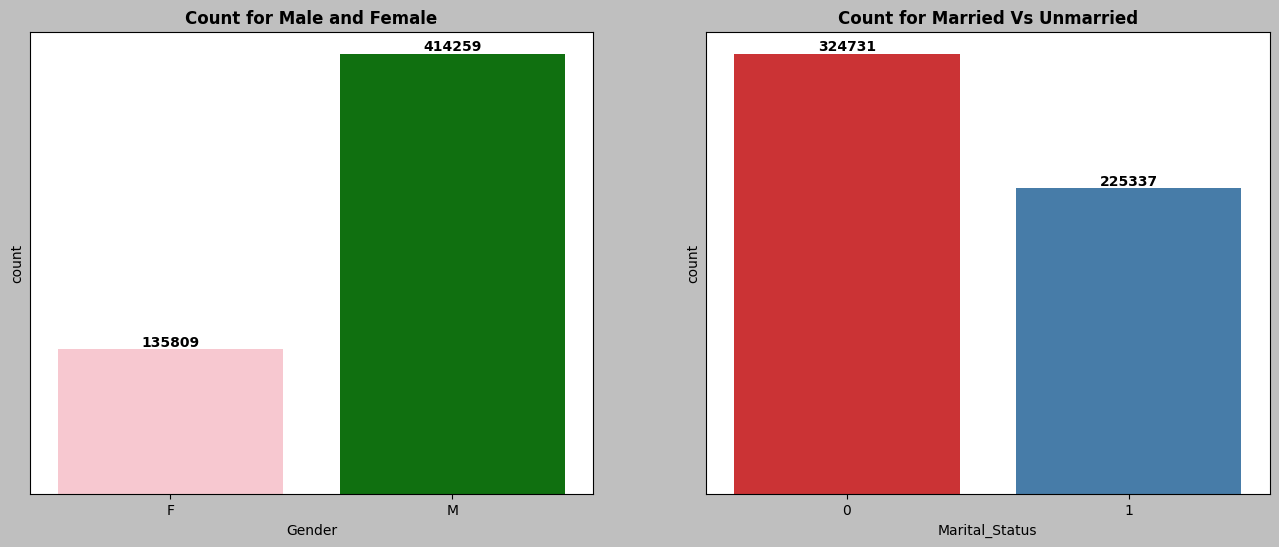

In [ ]:
# Univariate graph based on Gender
with plt.style.context('grayscale'):

    fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,6))
    sns.countplot(data = walmart, x = 'Gender',palette=['pink','green'],ax=ax[0])
    ax[0].set_yticks([])
    ax[0].set_title("Count for Male and Female",weight='bold',fontsize=12)
    for bars in ax[0].containers:
        ax[0].bar_label(bars,weight = 'bold')


    sns.countplot(data = walmart, x = 'Marital_Status',palette='Set1',ax=ax[1])
    ax[1].set_yticks([])
    ax[1].set_title("Count for Married Vs Unmarried",weight='bold',fontsize=12)
    for bars in ax[1].containers:
        ax[1].bar_label(bars,weight = 'bold')


**Finding**

* Walmart have more number of Male customers than female

* More number of Unmarried Customers than Married



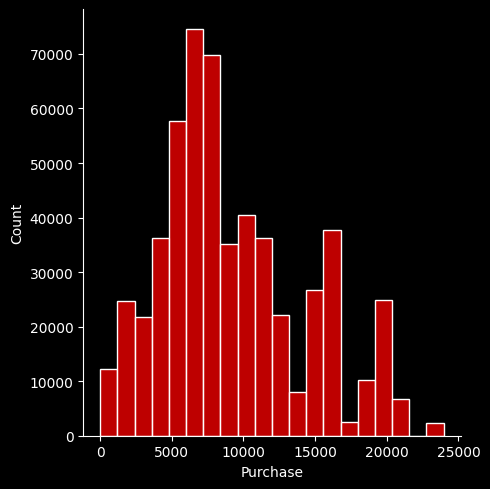

In [ ]:
# Graph based on Purchase and count
with plt.style.context('dark_background'):
    ax = sns.displot(data = walmart, x = 'Purchase',bins=20,color='r')

There are more number of purchases between the range 5000 to 10000


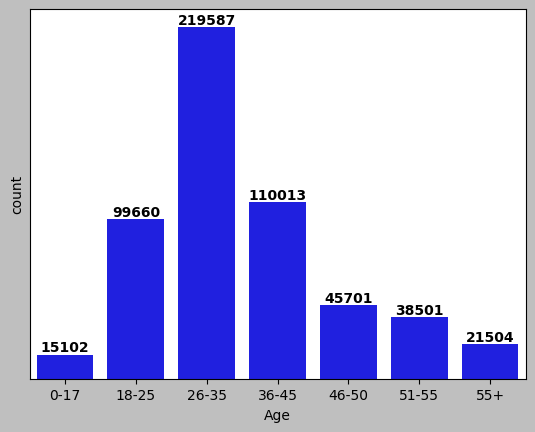

In [ ]:
# Count based on the age category
with plt.style.context('grayscale'):
    ax = sns.countplot(data = walmart, x = 'Age',color='b')
    plt.yticks([])
    for bar in ax.containers:
        ax.bar_label(bar,weight = 'bold')


This countplot shows there are more number of customer on walmart platform in the age category of 26-35


In [ ]:
# Using crosstab to generate contingency table
alpha = pd.crosstab(walmart['City_Category'],walmart['Stay_In_Current_City_Years'])
alpha

Stay_In_Current_City_Years,0,1,2,3,4+
City_Category,,,,,
A,24178,49305,27114,24804,22319
B,28687,83413,41772,42691,34610
C,21533,61103,32952,27790,27797


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='City_Category'>

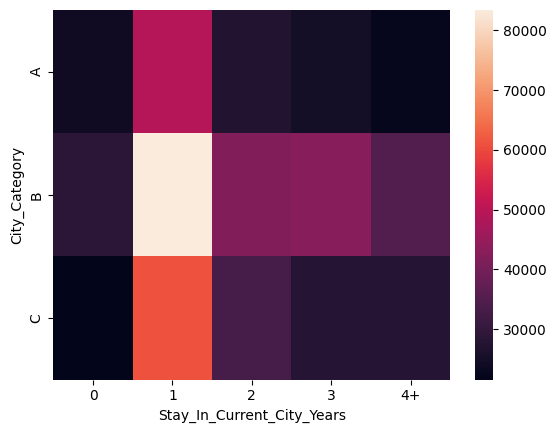

In [ ]:
# Heatmap
sns.heatmap(alpha)

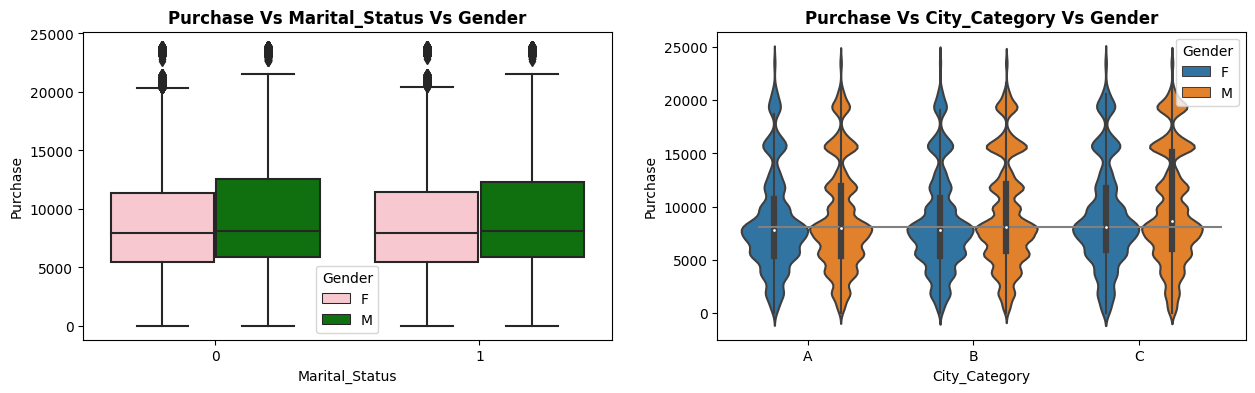

In [ ]:
# Generate bivariate graph showing relation between Marital Status, Purchase and Gender
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,4))
with plt.style.context('grayscale'):
  sns.boxplot(data=walmart,x='Marital_Status',y='Purchase',hue='Gender',palette=['pink','green'],ax=ax[0])
  ax[0].set_title('Purchase Vs Marital_Status Vs Gender',weight='bold',fontsize=12)


# Graph showing relationship between City Category, Purchase amount and Gender
sns.violinplot(data=walmart,x="City_Category",y='Purchase',hue='Gender',ax=ax[1])
ax[1].hlines(walmart['Purchase'].median(),-0.3,2.5,color='grey')
ax[1].set_title('Purchase Vs City_Category Vs Gender',weight='bold',fontsize=12)
plt.show()

* The bivariate graph shows that, males have spend more amount comparing to females.

  Although, marital status have no major affect on Purchase amount

* Overall, if we see amount spend by males from A, B and C city, we will get that males have spend more in all the three city comparing to females

  The City A and B have nearly same purchase amounts, but City C have greater purchase amount than A and B

____

## Check Missing Values and Outliers

##### Checking Null values

In [ ]:
# To check null values in each columns
[any(walmart[i].isnull()) for i in walmart.columns]

[False, False, False, False, False, False, False, False, False]

From above code we got a list of False values which indicates that there are no null values in any of the 10 columns

##### Checking Outliers

In [ ]:
walmart.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,4,B,1,0,5
freq,414259,219587,72308,231173,193821,324731,150933


In [ ]:
# Statistical summary for numerical columns
(wal := walmart.describe())

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In case of Purchase column the difference is huge, which we can easily verify by following code.

In [ ]:
# Difference between mean and median
wal.loc['mean','Purchase'] - wal.loc['50%','Purchase']

1216.9687129591257

The presence of outliers can also be depicted using Boxplot

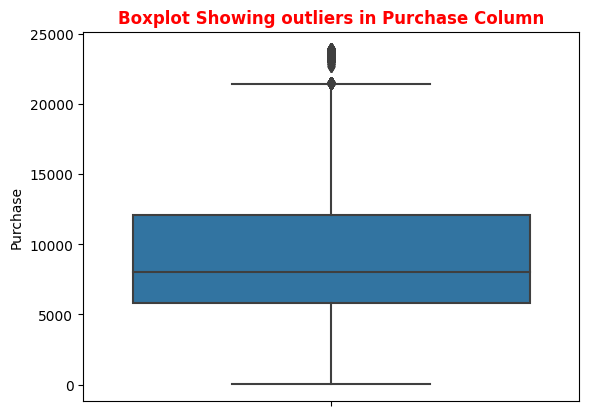

In [ ]:
sns.boxplot(data=walmart,y='Purchase')
plt.title('Boxplot Showing outliers in Purchase Column',color = 'red',fontsize=12,weight = 'bold')
plt.show()

In [ ]:
# Finding outliers using Inter Quartile Range
first_quart, third_quart = np.percentile(walmart['Purchase'],[25,75])
IQR = third_quart - first_quart

In [ ]:
# Filter the outliers and store into outliers variable
(outliers := walmart[(walmart['Purchase'] < first_quart - 1.5 * IQR) | (walmart['Purchase'] > third_quart + 1.5 * IQR)])

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,P00117642,M,26-35,2,B,3,0,10,23603
375,P00119342,F,36-45,3,A,1,0,10,23792
652,P00087042,M,18-25,9,B,1,0,10,23233
736,P00159542,F,26-35,20,C,2,0,10,23595
1041,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...
544488,P00116142,M,26-35,20,B,1,0,10,23753
544704,P00085342,F,18-25,4,B,2,0,10,23724
544743,P00202242,F,26-35,1,A,0,1,10,23529
545663,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
# Creating copy of the dataframe for the sake of future convenience
wals = walmart.copy()

In [ ]:
# Filtering out the outliers
walmart.drop(outliers.index,inplace=True)

In [ ]:
walmart.to_csv('walmart_clean.csv')

_____


## Data Explorations

In [ ]:
walmart.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8370
1,P00248942,F,0-17,10,A,2,0,1,15200


In [ ]:
# Average amout spend by all the customers
(total_mean := walmart['Purchase'].mean())

9195.62719518589

In [ ]:
# Separating male and female groups
female_data = walmart[walmart['Gender'] == 'F']
male_data  = walmart[walmart['Gender'] == 'M']

In [ ]:
# Average amount spend by the male customers
(m_mean := male_data['Purchase'].mean())

9367.724354697444

In [ ]:
# Average amount spend by the female customers
(f_mean := female_data['Purchase'].mean())

8671.049038603756

### Applying CLT on Female Data

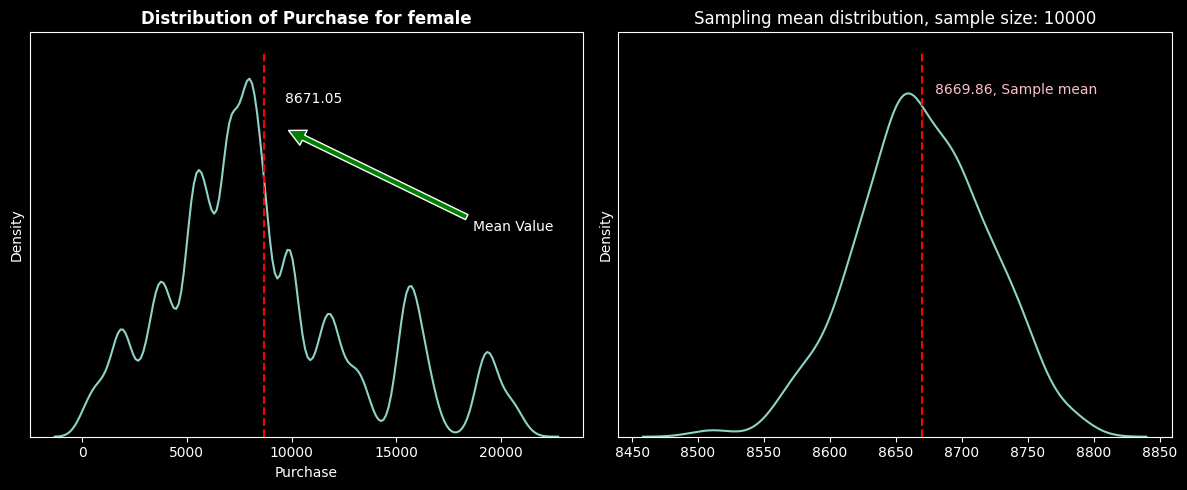

In [ ]:

# Taking 500 samples from female_data having sample size of 10000, appending mean of the samples to new list
s_mean_dist_f = []
for i in range(500):
  s_mean_dist_f.append(female_data.sample(n=10000,replace=True,random_state=None)['Purchase'].mean())

# Mean of mean of samples
np.mean(s_mean_dist_f)

with plt.style.context('dark_background'):

  # Create a 1x2 grid of subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  # Plot the first graph on the first subplot
  sns.kdeplot(female_data['Purchase'], ax=axs[0])
  axs[0].vlines(female_data['Purchase'].mean(), 0.0, 0.00015, color='red', linestyle='--')
  axs[0].annotate("Mean Value", xy=(female_data['Purchase'].mean() + 1000, 0.00012),
                  xytext=(female_data['Purchase'].mean() + 10000, 0.00008),
                  arrowprops=dict(facecolor='green', shrink=0.02))
  axs[0].annotate(f"{round(female_data['Purchase'].mean(), 2)}",
                  xy=((female_data['Purchase'].mean() + 1000, 0.00013)))
  axs[0].set_yticks([])
  axs[0].set_title('Distribution of Purchase for female', fontsize=12, weight='bold')

  # Plot the second graph on the second subplot
  sns.kdeplot(s_mean_dist_f, ax=axs[1])
  axs[1].text(np.mean(s_mean_dist_f) + 10, 0.008, f"{round(np.mean(s_mean_dist_f), 2)}, Sample mean", color='pink')
  axs[1].vlines(np.mean(s_mean_dist_f), 0.0, 0.009, color='r', linestyles="--")
  axs[1].set_yticks([])
  axs[1].set_title('Sampling mean distribution, sample size: 10000')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show the plots
  plt.show()


______

On comparing the above two graphs, we can easily say that the mean of sample means is approximately equal to the mean of Purchase column of female.

The distribution of original data points are not normal but distribution of sample means are normal, which is the unique characteristics of Central Limit Theorem

____

### Applying CLT on Male Data

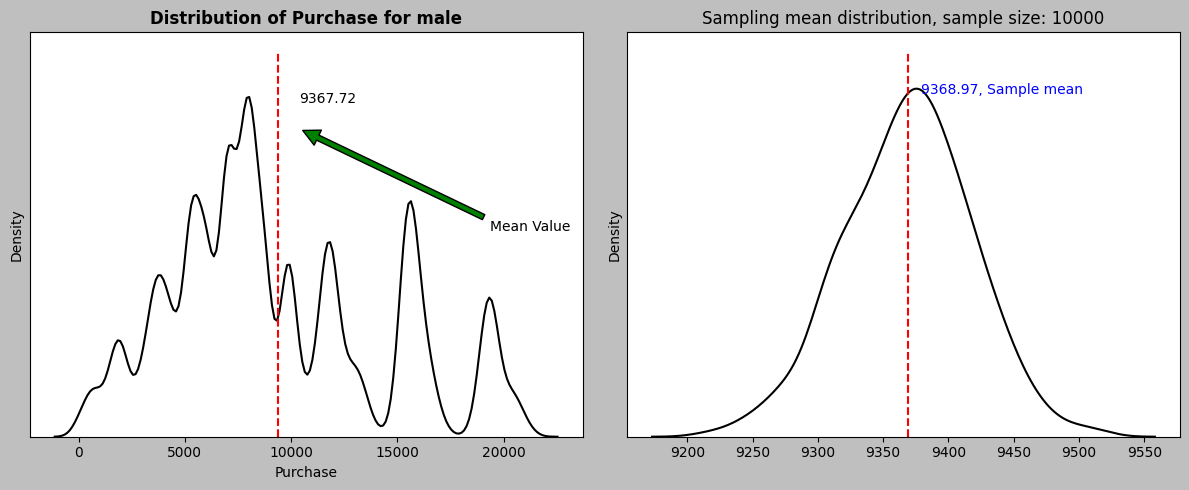

In [ ]:

# Taking 500 samples from male_data having sample size of 10000, appending mean of the samples to new list
s_mean_dist_m = []
for i in range(500):
  s_mean_dist_m.append(male_data.sample(n=10000,replace=True,random_state=None)['Purchase'].mean())

# Mean of mean of samples
np.mean(s_mean_dist_m)

with plt.style.context('grayscale'):

  # Create a 1x2 grid of subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  # Plot the first graph on the first subplot
  sns.kdeplot(male_data['Purchase'], ax=axs[0])
  axs[0].vlines(male_data['Purchase'].mean(), 0.0, 0.00015, color='red', linestyle='--')
  axs[0].annotate("Mean Value", xy=(male_data['Purchase'].mean() + 1000, 0.00012),
                  xytext=(male_data['Purchase'].mean() + 10000, 0.00008),
                  arrowprops=dict(facecolor='green', shrink=0.02))
  axs[0].annotate(f"{round(male_data['Purchase'].mean(), 2)}",
                  xy=((male_data['Purchase'].mean() + 1000, 0.00013)))
  axs[0].set_yticks([])
  axs[0].set_title('Distribution of Purchase for male', fontsize=12, weight='bold')

  # Plot the second graph on the second subplot
  sns.kdeplot(s_mean_dist_m, ax=axs[1])
  axs[1].text(np.mean(s_mean_dist_m) + 10, 0.008, f"{round(np.mean(s_mean_dist_m), 2)}, Sample mean", color='b')
  axs[1].vlines(np.mean(s_mean_dist_m), 0.0, 0.009, color='r', linestyles="--")
  axs[1].set_yticks([])
  axs[1].set_title('Sampling mean distribution, sample size: 10000')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show the plots
  plt.show()

Just like the previous example, the mean of sample mean of purchase column from male dataframe is approximately equal to the mean of purchase column from male column.

The distribution of our sample statistics is normal or gaussian.

**Finding**
> We found that average amount spend by male customers is higher than female customers.

 The plausible explanation of this finding could be following:

* More female customer prefer to buy items offline, whereas male prefer online.

* Females could be buying items from male's account, which is possible if they are living together.


____

## Confidence interval

The formula for finding confidence interval is given as,

```C.I = Point_estimate ± Marging_of_error```

where **Point_estimate** is the sample mean and

**Margin_of_error** constitutes of two entities. First, the critical value denoted by z and second, the measure of variability of the sampling distribution which is denoted **standard error**.

std_error = σ/√n




α | z-score
:---:| :---:
0.1 | 1.64
0.05 | 1.96
0.01 | 2.58

We can calculate the z-score corresponding to the confidence interval using z-table or using python formula
```norm.ppf(α/2)```


### Confidence_interval: 90

###### sample size : 10000

In [ ]:
# Take a sample with sample size of 10000 from female dataset
female = walmart[walmart['Gender'] == 'F']

sample = female.sample(n=10000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error = sample.std()/(np.sqrt(sample.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error = 1.64*std_error

Confidence_interval_l = sample.mean() - Margin_of_error
Confidence_interval_r = sample.mean() + Margin_of_error

Confidence_interval_l, Confidence_interval_r

(8534.924890686285, 8688.059509313716)

In [ ]:
# Finding the confidence interval with scipy library of python
norm.interval(0.90,sample.mean(),std_error)

(8534.698287542331, 8688.28611245767)

**90% confidence** means that if we take repeated random samples from a population, and construct a confidence interval for each sample using the sample method, we can expect that 90% of these intervals will capture the
population mean.




In [ ]:
# Take a sample with sample size of 10000 from male dataset
male = walmart[walmart['Gender'] == 'M']

sample = male.sample(n=10000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error = sample.std()/(np.sqrt(sample.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error = 1.64*std_error

Confidence_interval_l = sample.mean() - Margin_of_error
Confidence_interval_r = sample.mean() + Margin_of_error

Confidence_interval_l, Confidence_interval_r

(9239.718754503512, 9403.498445496487)

____

###### sample size: 5000

In [ ]:
# Take a sample with sample size of 10000 from female dataset
female = walmart[walmart['Gender'] == 'F']
sample = female.sample(n=5000,replace=True,random_state = 25250)['Purchase']

# Calculating standard_error
std_error = sample.std()/(np.sqrt(sample.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error = 1.64*std_error
Confidence_interval_l = sample.mean() - Margin_of_error
Confidence_interval_r = sample.mean() + Margin_of_error

female = Confidence_interval_l, Confidence_interval_r

# Take a sample with sample size of 10000 from male dataset
male = walmart[walmart['Gender'] == 'M']
sample = male.sample(n=5000,replace=True,random_state = 25200)['Purchase']

# Calculating standard_error
std_error = sample.std()/(np.sqrt(sample.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error = 1.64*std_error
Confidence_interval_l = sample.mean() - Margin_of_error
Confidence_interval_r = sample.mean() + Margin_of_error

male = Confidence_interval_l, Confidence_interval_r
print(f"The male confidence interval: {male},\nThe female confidence interval: {female}")

The male confidence interval: (9188.081946113296, 9420.006053886704),
The female confidence interval: (8603.934351474545, 8820.631248525457)


**Finding**

At 90 % level and sample size of 5000, we can say that average spending of male and female's confidence interval is not overlapping, which can also be verified by the graph below


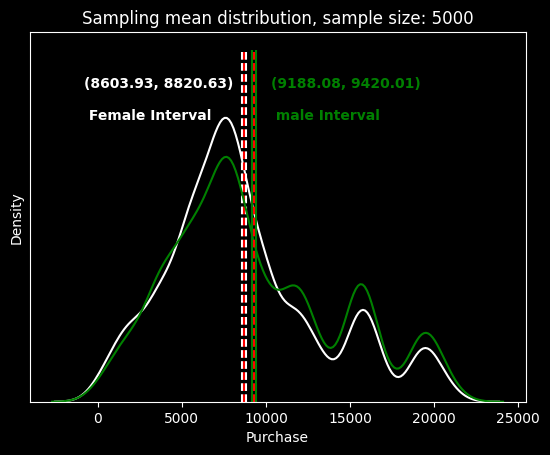

In [ ]:
# Take a sample with sample size of 5000 from male dataset
male = walmart[walmart['Gender'] == 'M']
sample_m = male.sample(n=5000,replace=True,random_state = 25200)['Purchase']

# Calculating standard_error
std_error_m = sample_m.std()/(np.sqrt(sample_m.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_m = 1.64*std_error_m
left_interval_m = sample_m.mean() - Margin_of_error_m
right_interval_m = sample_m.mean() + Margin_of_error_m


# Take a sample with sample size of 5000 from female dataset
female = walmart[walmart['Gender'] == 'F']
sample_f = female.sample(n=5000,replace=True,random_state = 25250)['Purchase']
# Calculating standard_error
std_error_f = sample_f.std()/(np.sqrt(sample_f.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_f = 1.64*std_error_f
left_interval_f = sample_f.mean() - Margin_of_error_f
right_interval_f = sample_f.mean() + Margin_of_error_f


# Distribution of mean of sample means from Purchase column of female
with plt.style.context('dark_background'):

  ax = sns.kdeplot(sample_f,color='white')
  ax.vlines(left_interval_f,0.0,0.00015,linestyle='--')
  ax.vlines(right_interval_f,0.0,0.00015,linestyle='--')
  ax.text(np.mean(sample_f)-9500,0.00012,f"{round(left_interval_f,2),round(right_interval_f,2)}\n\n Female Interval",color='white',weight='bold')
  ax.vlines(np.mean(sample_f),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(sample_m,color='g')
  ax.vlines(left_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(sample_m)+1005,0.00012,f"{round(left_interval_m,2),round(right_interval_m,2)}\n\n male Interval",color='g',weight='bold')
  ax.vlines(np.mean(sample_m),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

______

### At 95% confidence level

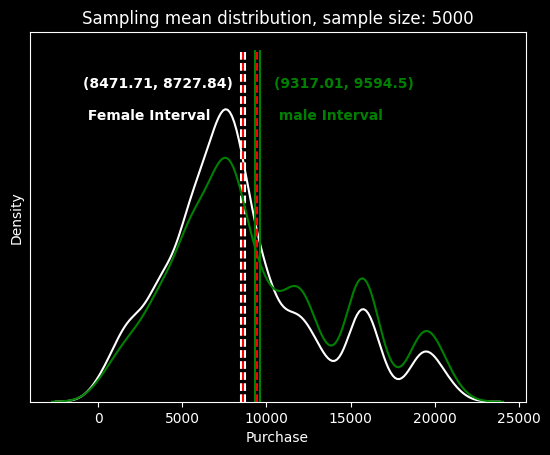

In [ ]:
# Take a sample with sample size of 5000 from male dataset
male = walmart[walmart['Gender'] == 'M']
sample_m = male.sample(n=5000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error_m = sample_m.std()/(np.sqrt(sample_m.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_m = 1.95*std_error_m
left_interval_m = sample_m.mean() - Margin_of_error_m
right_interval_m = sample_m.mean() + Margin_of_error_m


# Take a sample with sample size of 5000 from female dataset
female = walmart[walmart['Gender'] == 'F']
sample_f = female.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_f = sample_f.std()/(np.sqrt(sample_f.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_f = 1.95*std_error_f
left_interval_f = sample_f.mean() - Margin_of_error_f
right_interval_f = sample_f.mean() + Margin_of_error_f


# Distribution of mean of sample means from Purchase column of female
with plt.style.context('dark_background'):

  ax = sns.kdeplot(sample_f,color='white')
  ax.vlines(left_interval_f,0.0,0.00015,linestyle='--')
  ax.vlines(right_interval_f,0.0,0.00015,linestyle='--')
  ax.text(np.mean(sample_f)-9500,0.00012,f"{round(left_interval_f,2),round(right_interval_f,2)}\n\n Female Interval",color='white',weight='bold')
  ax.vlines(np.mean(sample_f),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(sample_m,color='g')
  ax.vlines(left_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(sample_m)+1005,0.00012,f"{round(left_interval_m,2),round(right_interval_m,2)}\n\n male Interval",color='g',weight='bold')
  ax.vlines(np.mean(sample_m),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

_____

### At 99% confidence level

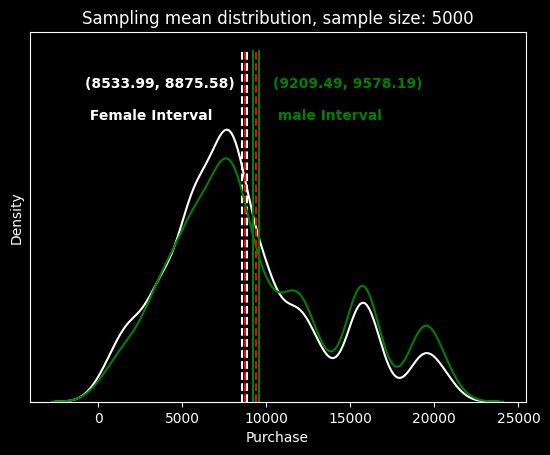

In [ ]:
# Take a sample with sample size of 5000 from male dataset
male = walmart[walmart['Gender'] == 'M']
sample_m = male.sample(n=5000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error_m = sample_m.std()/(np.sqrt(sample_m.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_m = 2.58*std_error_m
left_interval_m = sample_m.mean() - Margin_of_error_m
right_interval_m = sample_m.mean() + Margin_of_error_m


# Take a sample with sample size of 5000 from female dataset
female = walmart[walmart['Gender'] == 'F']
sample_f = female.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_f = sample_f.std()/(np.sqrt(sample_f.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_f = 2.57*std_error_f
left_interval_f = sample_f.mean() - Margin_of_error_f
right_interval_f = sample_f.mean() + Margin_of_error_f


# Distribution of mean of sample means from Purchase column of female
with plt.style.context('dark_background'):

  ax = sns.kdeplot(sample_f,color='white')
  ax.vlines(left_interval_f,0.0,0.00015,linestyle='--')
  ax.vlines(right_interval_f,0.0,0.00015,linestyle='--')
  ax.text(np.mean(sample_f)-9500,0.00012,f"{round(left_interval_f,2),round(right_interval_f,2)}\n\n Female Interval",color='white',weight='bold')
  ax.vlines(np.mean(sample_f),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(sample_m,color='g')
  ax.vlines(left_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(sample_m)+1005,0.00012,f"{round(left_interval_m,2),round(right_interval_m,2)}\n\n male Interval",color='g',weight='bold')
  ax.vlines(np.mean(sample_m),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

### Finding
From the above graph, with sample size of 5000 and at confidence level of 90%, 95% and 99%, We can confidently say that confidence interval for male and female is not overlapping.

> Target more ads on women customers.

> To increase women spending, we can offer discounts to women's products.

_____

### Married_Status

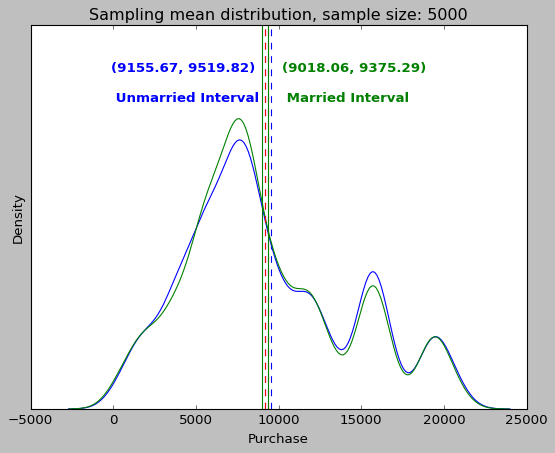

In [ ]:
# Filter Married and Unmarried Status
married_ = walmart[walmart['Marital_Status'] == 1]
married = married_.sample(n=5000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error_m = married.std()/(np.sqrt(married.shape[0]))

# For 99% confidence level, Margin of error is given as
Margin_of_error_m = 2.58*std_error_m
left_interval_m = married.mean() - Margin_of_error_m
right_interval_m = married.mean() + Margin_of_error_m



unmarried_ = walmart[walmart['Marital_Status'] == 0]
unmarried = unmarried_.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_u = unmarried.std()/(np.sqrt(unmarried.shape[0]))

# For 99% confidence level, Margin of error is given as
Margin_of_error_u = 2.58*std_error_u
left_interval_u = unmarried.mean() - Margin_of_error_u
right_interval_u = unmarried.mean() + Margin_of_error_u


# Distribution of mean of sample means from Purchase column unmarried
with plt.style.context('classic'):

  ax = sns.kdeplot(unmarried,color='b')
  ax.vlines(left_interval_u,0.0,0.00015,linestyle='--',color='b')
  ax.vlines(right_interval_u,0.0,0.00015,linestyle='--',color='b')
  ax.text(np.mean(unmarried)-9500,0.00012,f"{round(left_interval_u,2),round(right_interval_u,2)}\n\n Unmarried Interval",color='b',weight='bold')
  ax.vlines(np.mean(unmarried),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(married,color='g')
  ax.vlines(left_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(married)+1005,0.00012,f"{round(left_interval_m,2),round(right_interval_m,2)}\n\n Married Interval",color='g',weight='bold')
  ax.vlines(np.mean(married),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

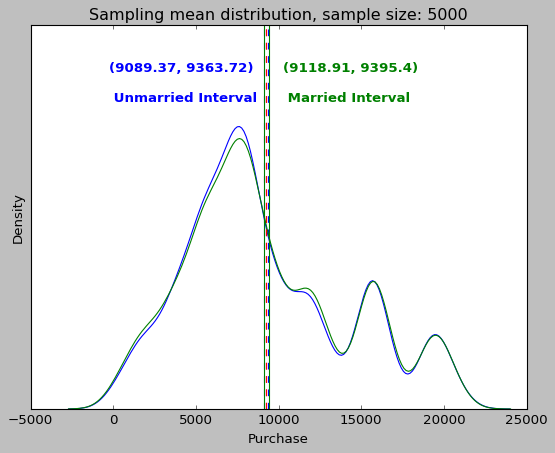

In [ ]:
# Filter Married Status
married_ = walmart[walmart['Marital_Status'] == 1]
married = married_.sample(n=5000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error_m = married.std()/(np.sqrt(married.shape[0]))

# For 95% confidence level, Margin of error is given as
Margin_of_error_m = 1.96*std_error_m
left_interval_m = married.mean() - Margin_of_error_m
right_interval_m = married.mean() + Margin_of_error_m

# Filter Unmarried Status
unmarried_ = walmart[walmart['Marital_Status'] == 0]
unmarried = unmarried_.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_u = unmarried.std()/(np.sqrt(unmarried.shape[0]))

# For 95% confidence level, Margin of error is given as
Margin_of_error_u = 1.96*std_error_u
left_interval_u = unmarried.mean() - Margin_of_error_u
right_interval_u = unmarried.mean() + Margin_of_error_u


# Distribution of mean of sample means from Purchase column unmarried
with plt.style.context('classic'):

  ax = sns.kdeplot(unmarried,color='b')
  ax.vlines(left_interval_u,0.0,0.00015,linestyle='--',color ='b')
  ax.vlines(right_interval_u,0.0,0.00015,linestyle='--',color='b')
  ax.text(np.mean(unmarried)-9500,0.00012,f"{round(left_interval_u,2),round(right_interval_u,2)}\n\n Unmarried Interval",color='b',weight='bold')
  ax.vlines(np.mean(unmarried),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(married,color='g')
  ax.vlines(left_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(married)+1005,0.00012,f"{round(left_interval_m,2),round(right_interval_m,2)}\n\n Married Interval",color='g',weight='bold')
  ax.vlines(np.mean(married),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

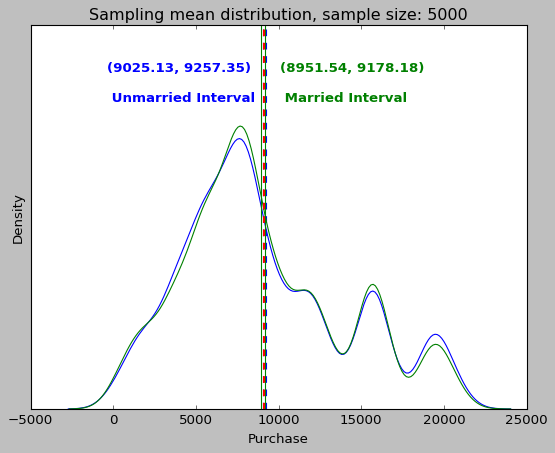

In [ ]:
# Filter Married and Unmarried Status
married_ = walmart[walmart['Marital_Status'] == 1]
married = married_.sample(n=5000,replace=True,random_state = None)['Purchase']

# Calculating standard_error
std_error_m = married.std()/(np.sqrt(married.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_m = 1.64*std_error_m
left_interval_m = married.mean() - Margin_of_error_m
right_interval_m = married.mean() + Margin_of_error_m



unmarried_ = walmart[walmart['Marital_Status'] == 0]
unmarried = unmarried_.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_u = unmarried.std()/(np.sqrt(unmarried.shape[0]))

# For 90% confidence level, Margin of error is given as
Margin_of_error_u = 1.64*std_error_u
left_interval_u = unmarried.mean() - Margin_of_error_u
right_interval_u = unmarried.mean() + Margin_of_error_u


# Distribution of mean of sample means from Purchase column unmarried
with plt.style.context('classic'):

  ax = sns.kdeplot(unmarried,color='b')
  ax.vlines(left_interval_u,0.0,0.00015,linestyle='--',color='b')
  ax.vlines(right_interval_u,0.0,0.00015,linestyle='--',color='b')
  ax.text(np.mean(unmarried)-9500,0.00012,f"{round(left_interval_u,2),round(right_interval_u,2)}\n\n Unmarried Interval",color='b',weight='bold')
  ax.vlines(np.mean(unmarried),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(married,color='g')
  ax.vlines(left_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_m,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(married)+1005,0.00012,f"{round(left_interval_m,2),round(right_interval_m,2)}\n\n Married Interval",color='g',weight='bold')
  ax.vlines(np.mean(married),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

**Finding**

* From all the above 3 graphs it is clear that inerval is overlapping

______

### Age Group

In [ ]:
# Merging age group 18-25 and 26-35 to 18-35
def age_group(x):
  if x['Age'] == '18-25' or x['Age'] == '26-35':
    x['Age'] = '18-35'
  elif x['Age'] == '36-45' or x['Age'] == '46-50':
    x['Age'] = '36-50'
  elif x['Age'] == '51-55' or x['Age'] == '55+':
    x['Age'] = '51+'
  else:
    x

  return x
walmart = walmart.apply(age_group,axis=1)

In [ ]:
walmart['Age'].unique()

array(['0-17', '51+', '18-35', '36-50'], dtype=object)

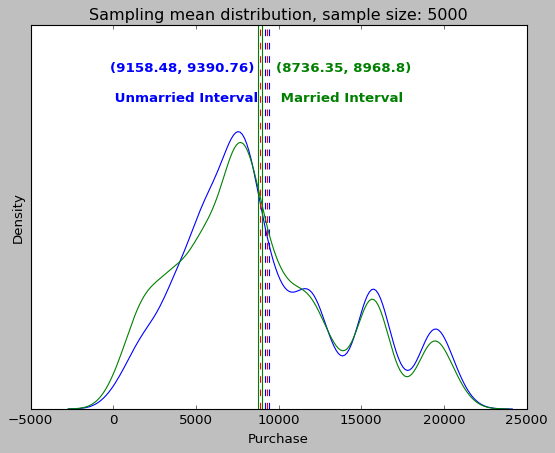

In [ ]:
# Filter for group1 i.e '0-17'
group1_ = walmart[walmart['Age'] == '0-17']
group1 = group1_.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_1 = group1.std()/(np.sqrt(group1.shape[0]))
# For 90% confidence level, Margin of error is given as
Margin_of_error_1 = 1.64*std_error_1
left_interval_1 = group1.mean() - Margin_of_error_1
right_interval_1 = group1.mean() + Margin_of_error_1

# Filter for group2 i.e '18-35'
group2_ = walmart[walmart['Age'] == '18-35']
group2 = group2_.sample(n=5000,replace=True,random_state = None)['Purchase']
# Calculating standard_error
std_error_2 = group2.std()/(np.sqrt(group2.shape[0]))
# For 90% confidence level, Margin of error is given as
Margin_of_error_2 = 1.64*std_error_2
left_interval_2 = group2.mean() - Margin_of_error_2
right_interval_2 = group2.mean() + Margin_of_error_2



# Distribution of mean of sample means from Purchase column '
with plt.style.context('classic'):

  ax = sns.kdeplot(group2,color='b')
  ax.vlines(left_interval_2,0.0,0.00015,linestyle='--',color='b')
  ax.vlines(right_interval_2,0.0,0.00015,linestyle='--',color='b')
  ax.text(np.mean(group2)-9500,0.00012,f"{round(left_interval_2,2),round(right_interval_2,2)}\n\n Unmarried Interval",color='b',weight='bold')
  ax.vlines(np.mean(group2),0.0,0.00015,color='r',linestyles= "--")

# Distribution of mean of sample means from Purchase column of male
  ax = sns.kdeplot(group1,color='g')
  ax.vlines(left_interval_1,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_1,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(group1)+1005,0.00012,f"{round(left_interval_1,2),round(right_interval_1,2)}\n\n Married Interval",color='g',weight='bold')
  ax.vlines(np.mean(group1),0.0,0.00015,color='r',linestyles= "--")
  plt.yticks([])
  plt.title('Sampling mean distribution, sample size: 5000')
  plt.show()

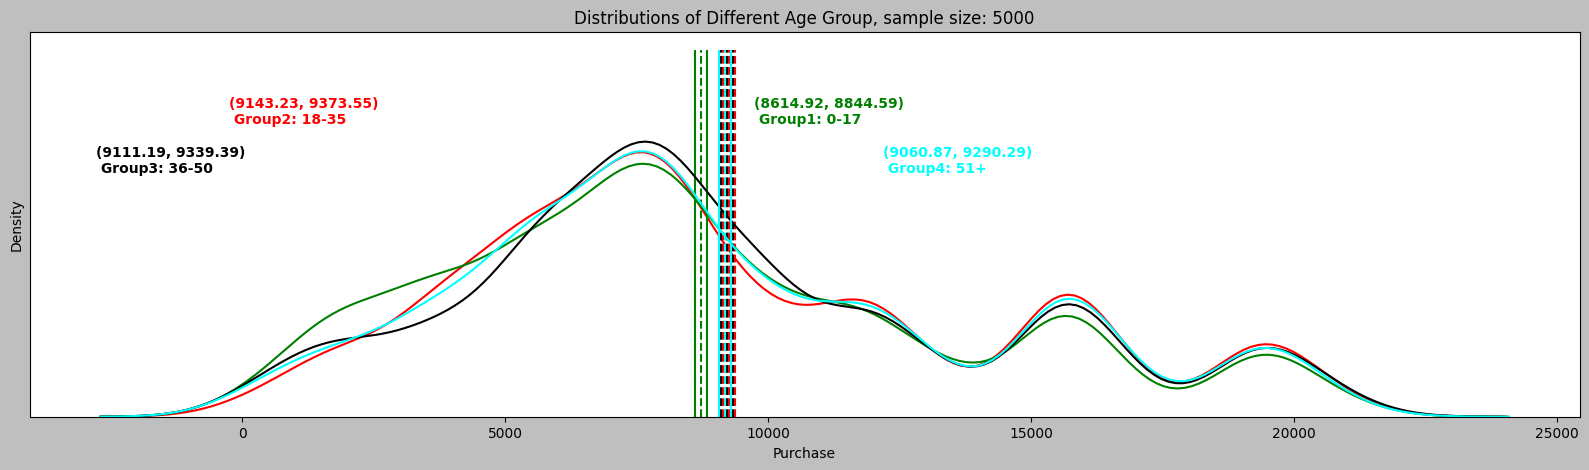

In [ ]:
# Filter for group1 i.e '0-17'
group1_ = walmart[walmart['Age'] == '0-17']
group1 = group1_.sample(n=5000,replace=True,random_state = 1)['Purchase']
# Calculating standard_error
std_error_1 = group1.std()/(np.sqrt(group1.shape[0]))
# For 90% confidence level, Margin of error is given as
Margin_of_error_1 = 1.64*std_error_1
left_interval_1 = group1.mean() - Margin_of_error_1
right_interval_1 = group1.mean() + Margin_of_error_1

# Filter for group2 i.e '18-35'
group2_ = walmart[walmart['Age'] == '18-35']
group2 = group2_.sample(n=5000,replace=True,random_state = 2)['Purchase']
# Calculating standard_error
std_error_2 = group2.std()/(np.sqrt(group2.shape[0]))
# For 90% confidence level, Margin of error is given as
Margin_of_error_2 = 1.64*std_error_2
left_interval_2 = group2.mean() - Margin_of_error_2
right_interval_2 = group2.mean() + Margin_of_error_2

# Filter for group3 i.e '36-50'
group3_ = walmart[walmart['Age'] == '36-50']
group3 = group3_.sample(n=5000,replace=True,random_state = 3)['Purchase']
# Calculating standard_error
std_error_3 = group3.std()/(np.sqrt(group3.shape[0]))
# For 90% confidence level, Margin of error is given as
Margin_of_error_3 = 1.64*std_error_3
left_interval_3 = group3.mean() - Margin_of_error_3
right_interval_3 = group3.mean() + Margin_of_error_3

# Filter for group4 i.e '51+'
group4_ = walmart[walmart['Age'] == '51+']
group4 = group4_.sample(n=5000,replace=True,random_state = 4)['Purchase']
# Calculating standard_error
std_error_4 = group4.std()/(np.sqrt(group4.shape[0]))
# For 90% confidence level, Margin of error is given as
Margin_of_error_4 = 1.64*std_error_4
left_interval_4 = group4.mean() - Margin_of_error_4
right_interval_4 = group4.mean() + Margin_of_error_4


# Distribution
with plt.style.context('grayscale'):
  plt.figure(figsize=(20,5))
  # group2
  ax = sns.kdeplot(group2,color='r')
  ax.vlines(left_interval_2,0.0,0.00015,linestyle='--',color='r')
  ax.vlines(right_interval_2,0.0,0.00015,linestyle='--',color='r')
  ax.text(np.mean(group2)-9500,0.00012,f"{round(left_interval_2,2),round(right_interval_2,2)}\n Group2: 18-35",color='r',weight='bold')
  ax.vlines(np.mean(group2),0.0,0.00015,color='r',linestyles= "--")

# group1
  ax = sns.kdeplot(group1,color='g')
  ax.vlines(left_interval_1,0.0,0.00015,linestyle='-',color='g')
  ax.vlines(right_interval_1,0.0,0.00015,linestyle='-',color='g')
  ax.text(np.mean(group1)+1005,0.00012,f"{round(left_interval_1,2),round(right_interval_1,2)}\n Group1: 0-17",color='g',weight='bold')
  ax.vlines(np.mean(group1),0.0,0.00015,color='g',linestyles= "--")

  # group4
  ax = sns.kdeplot(group4,color='k')
  ax.vlines(left_interval_4,0.0,0.00015,linestyle='--',color='k')
  ax.vlines(right_interval_4,0.0,0.00015,linestyle='--',color='k')
  ax.text(np.mean(group4)-12000,0.00010,f"{round(left_interval_4,2),round(right_interval_4,2)}\n Group3: 36-50",color='k',weight='bold')
  ax.vlines(np.mean(group4),0.0,0.00015,color='k',linestyles= "--")

# group3
  ax = sns.kdeplot(group3,color='cyan')
  ax.vlines(left_interval_3,0.0,0.00015,linestyle='-',color='cyan')
  ax.vlines(right_interval_3,0.0,0.00015,linestyle='-',color='cyan')
  ax.text(np.mean(group3)+3005,0.00010,f"{round(left_interval_3,2),round(right_interval_3,2)}\n Group4: 51+",color='cyan',weight='bold')
  ax.vlines(np.mean(group3),0.0,0.00015,color='cyan',linestyles= "--")
  plt.yticks([])
  plt.title('Distributions of Different Age Group, sample size: 5000')

  plt.show()

**Findings**
```
Groups   |Group1(0-17) | Group2(18-35) | Group3(36-50) | Group4(50+)  |
:------: |:----------: | :-----------: | :-----------: | :----------: |
Overlaps | No overlap  | Group3,Group4 | Group2,Group4 | Group2,Group3|
```

Since 0-17 age group's mean purchase amount is not overlapping and less than the other age groups, we can focus more on this group by running ads and giving discounts.

## Insights

**Gender**:  More amount spend by male customers than females

**Married_Status**: More spending done by unmarried customers than married

**Purchase**: More spending in the range of 5000 to 10000.

**Age**: Age Category of 26-35 spended more than others

**City**: Overall City C customers have spend more amount than others

**Gender confidence interval**: No confidence interval overlap between male spending and female spending

**Marrital_Status Confidence interval**: Confidence interval overlap between Married and Unmarried

**Age Confidence interval**: Confidence interval overlap between age group 18-35, 36-50 and 51+, but not with group group 0-17



## Recommendations

* More target on female customers using ads and discounts.

* Always maintains the stocks of items in the price range of 5000 and 10000.

* Overhaul the stores in City A and City B and give few discounts so people frequently come to stores and spend money.

* Make strategies for male and female customers separately.

* Make separate strategy for 0-17 age group customers
